
## Comparing Linear Discriminative Classifier & Naive Bayes Classifier

### LD Classifier

Linear Discriminator classifier mainly depends upon data distribution, hence if the data is not normally distributed. Classifier may not perform better

In [41]:
import pandas as pd
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv("data.csv", index_col=0)

For easy plotting purpose and comparison only 2 classes have been considered

In [43]:
data = data[(data['type']=='saab') | (data['type']=='bus')]
y = data.type
x = data.loc[:,['COMPACTNESS', 'CIRCULARITY', 'DISTANCE CIRCULARITY', 'RADIUS RATIO',
       'PR.AXIS ASPECT RATIO', 'MAX.LENGTH ASPECT RATIO', 'SCATTER RATIO',
       'ELONGATEDNESS', 'PR.AXIS RECTANGULARITY', 'MAX.LENGTH RECTANGULARITY',
       'SCALED VARIANCE ALONG MAJOR AXIS', 'SCALED VARIANCE ALONG MINOR AXIS',
       'SCALED RADIUS OF GYRATION', 'SKEWNESS ABOUT MAJOR AXIS',
       'SKEWNESS ABOUT MINOR AXIS', 'KURTOSIS ABOUT MINOR AXIS',
       'KURTOSIS ABOUT MAJOR AXIS', 'HOLLOWS RATIO']]

print(x.shape)

(435, 18)


Target classes are plotted to check if the data is balanced

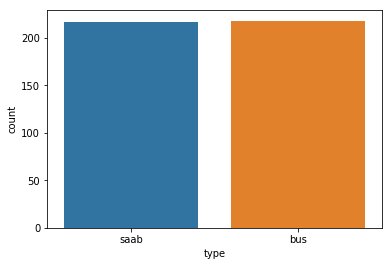

In [44]:
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
plt.show()

As mentioned before, plotting the attributions distrubution, if its normally distributed, LDA should yield good results

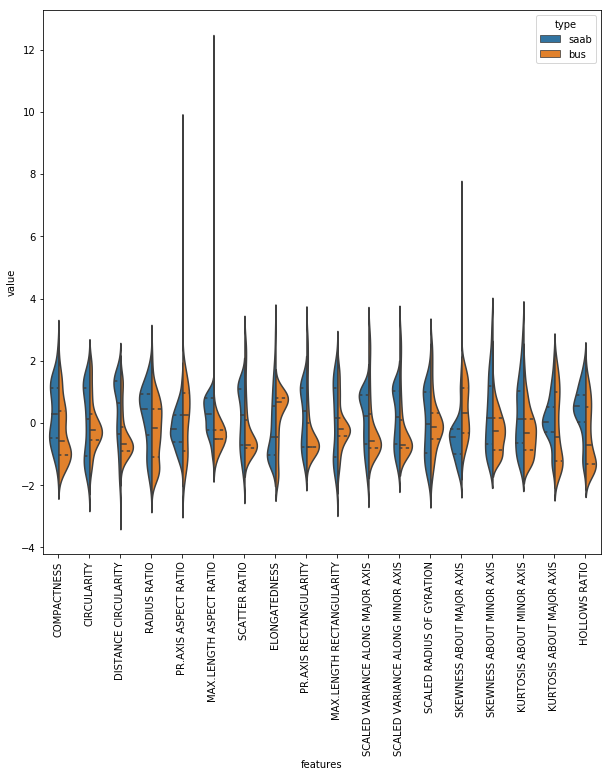

In [45]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:18]],axis=1)
data = pd.melt(data,id_vars="type",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="type", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

Normalization and checking if there is any missing value

In [46]:
X = (x - x.mean()) / (x.std())
print(X.isnull().any())

COMPACTNESS                         False
CIRCULARITY                         False
DISTANCE CIRCULARITY                False
RADIUS RATIO                        False
PR.AXIS ASPECT RATIO                False
MAX.LENGTH ASPECT RATIO             False
SCATTER RATIO                       False
ELONGATEDNESS                       False
PR.AXIS RECTANGULARITY              False
MAX.LENGTH RECTANGULARITY           False
SCALED VARIANCE ALONG MAJOR AXIS    False
SCALED VARIANCE ALONG MINOR AXIS    False
SCALED RADIUS OF GYRATION           False
SKEWNESS ABOUT MAJOR AXIS           False
SKEWNESS ABOUT MINOR AXIS           False
KURTOSIS ABOUT MINOR AXIS           False
KURTOSIS ABOUT MAJOR AXIS           False
HOLLOWS RATIO                       False
dtype: bool


Building the LDA classifier and predicting on testing data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=324)

LDA = lda()
LDA.fit(X_train,y_train)
predicted = LDA.predict(X_test)


In [48]:
Accuracy = accuracy_score(y_true=y_test,y_pred = predicted)
print(Accuracy*100)
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

100.0
             precision    recall  f1-score   support

        bus       1.00      1.00      1.00        24
       saab       1.00      1.00      1.00        20

avg / total       1.00      1.00      1.00        44

[[24  0]
 [ 0 20]]


As predicted, since all attributes are normally distributed, LDA gives 100% accuracy

### Naive Bayes Classifier

Naive Bayes basically consider all the attributes as independent, so even if there is relation between attributes, that won't be considered.

In [49]:
data = pd.read_csv("data.csv", index_col=0)
data = data[(data['type']=='saab') | (data['type']=='bus')]
y = data.type
x = data.loc[:,['COMPACTNESS', 'CIRCULARITY', 'DISTANCE CIRCULARITY', 'RADIUS RATIO',
       'PR.AXIS ASPECT RATIO', 'MAX.LENGTH ASPECT RATIO', 'SCATTER RATIO',
       'ELONGATEDNESS', 'PR.AXIS RECTANGULARITY', 'MAX.LENGTH RECTANGULARITY',
       'SCALED VARIANCE ALONG MAJOR AXIS', 'SCALED VARIANCE ALONG MINOR AXIS',
       'SCALED RADIUS OF GYRATION', 'SKEWNESS ABOUT MAJOR AXIS',
       'SKEWNESS ABOUT MINOR AXIS', 'KURTOSIS ABOUT MINOR AXIS',
       'KURTOSIS ABOUT MAJOR AXIS', 'HOLLOWS RATIO']]

First we are checking the model accuracy with keeping all the attributes

In [51]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predictedG = gnb.predict(X_test)
AccuracyG = accuracy_score(y_true = y_test, y_pred = predictedG)
print(AccuracyG*100)
print(metrics.classification_report(y_test, predictedG))
print(metrics.confusion_matrix(y_test, predictedG))

75.0
             precision    recall  f1-score   support

        bus       0.84      0.67      0.74        24
       saab       0.68      0.85      0.76        20

avg / total       0.77      0.75      0.75        44

[[16  8]
 [ 3 17]]


According to above gragh few attributes are strongly correlated, example is shown below.

so these removing these attributes may yield good results in Naive Bayes Classifier

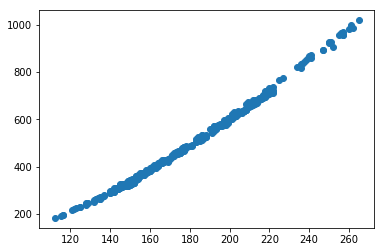

In [52]:
plt.scatter(x['SCATTER RATIO'],x['SCALED VARIANCE ALONG MINOR AXIS'])
plt.show()

In [53]:
y = data.type
x = data.loc[:,['COMPACTNESS','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SKEWNESS ABOUT MAJOR AXIS',
          'KURTOSIS ABOUT MINOR AXIS']]

X = (x - x.mean()) / (x.std())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=324)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predictedG = gnb.predict(X_test)
AccuracyG = accuracy_score(y_true = y_test, y_pred = predictedG)
print(AccuracyG*100)
print(metrics.classification_report(y_test, predictedG))
print(metrics.confusion_matrix(y_test, predictedG))

81.8181818182
             precision    recall  f1-score   support

        bus       0.86      0.79      0.83        24
       saab       0.77      0.85      0.81        20

avg / total       0.82      0.82      0.82        44

[[19  5]
 [ 3 17]]


By removing all dependent attributes, by only having 5 attributes we achieved 82% accuracy

## Conclusion

Naive Bayes classifier considers all attributes are independent, so by having only true independent attributes and removing the correlated attributes yields good results.

On the other hand, LDA really works well if the attributes are normally distributed.